## Zoe Markovits - Data Mining Project Three
## Beer Recommendation System

### Importing and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
df = pd.read_json('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Three/beer-data.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291429 entries, 0 to 291428
Data columns (total 15 columns):
abv                291429 non-null object
avgreviewscore     291429 non-null float64
beername           291428 non-null object
brewery            291429 non-null object
date               291429 non-null object
feel               152772 non-null object
look               152772 non-null object
overall            152772 non-null object
reviewdeviation    116268 non-null object
reviewscore        291429 non-null float64
reviewtext         291429 non-null object
smell              152772 non-null object
style              291429 non-null object
tase               152772 non-null object
username           291378 non-null object
dtypes: float64(2), object(13)
memory usage: 33.4+ MB


In [3]:
df.head()

,abv,avgreviewscore,beername,brewery,date,feel,look,overall,reviewdeviation,reviewscore,reviewtext,smell,style,tase,username
0,5.20%\n\t\t,3.60,Fat Tire Amber Ale,| New Belgium Brewing,"Jul 18, 2017",feel: 3.5,look: 3.25,overall: 3.25,None,3.54,[ rDev ],smell: 3.5,American Amber / Red Ale,taste: 3.75,petrusek23
1,8.70%\n\t\t,4.20,Sublimely Self-Righteous Black IPA,| Stone Brewing,"Aug 30, 2016",feel: 4,look: 4.25,overall: 4,None,3.96,"[ rDev , A twelve ounce bottle dated 07/09/16...",smell: 3.75,American Black Ale,taste: 4,Prager62
2,9.20%\n\t\t,3.97,Hog Heaven: Imperial Red IPA,| Avery Brewing Company,"Mar 05, 2017",feel: 4,look: 4.5,overall: 4,None,3.97,"[ rDev 0%, L: Hazy, opaque amber with a cream...",smell: 3.75,American Amber / Red Ale,taste: 4,HorseheadsHopHead
3,5.30%\n\t\t,3.78,Santa's Private Reserve Ale,| Rogue Ales,"Dec 20, 2016",feel: 3.75,look: 4,overall: 3.5,None,3.62,[ rDev ],smell: 3.75,American Amber / Red Ale,taste: 3.5,DangerDawg
4,7.20%\n\t\t,4.19,Zoe,| Maine Beer Company,"Mar 27, 2017",feel: 4.25,look: 4.5,overall: 4,None,4.12,[ rDev ],smell: 4.25,American Amber / Red Ale,taste: 4,CrimeDog


In [4]:
df = df.drop(['reviewdeviation'], axis=1)

# Cleaning column names
df.rename(columns={'abv':'ABV',
                   'avgreviewscore':'Avg_Review_Score',
                   'beername':'Beername',
                   'brewery':'Brewery',
                   'date':'Review_Date',
                   'feel':'Review_Feel',
                   'look':'Review_Look',
                   'overall':'Review_Overall',
                   'reviewscore':'Review_Score',
                   'reviewtext':'Review_Text',
                   'smell':'Review_Smell',
                   'style':'Style',
                   'tase':'Review_Taste',
                   'username':'Reviewer_Username'}, inplace=True)

#Reordering columns
df = df[['Style','Brewery','Beername','ABV','Avg_Review_Score','Reviewer_Username','Review_Date','Review_Score',\
         'Review_Look','Review_Smell','Review_Taste','Review_Feel','Review_Overall','Review_Text']]

#Cleaning column values
df['Brewery'] = df['Brewery'].map(lambda x: x.lstrip('| '))
df['ABV'] = df['ABV'].map(lambda x: x.rstrip('%\n\t\t'))
df['ABV'] = pd.to_numeric(df['ABV'], errors='coerce')
df['Review_Look'] = df['Review_Look'].map(lambda x: str(x)[6:])
df['Review_Look'] = pd.to_numeric(df['Review_Look'])
df['Review_Smell'] = df['Review_Smell'].map(lambda x: str(x)[7:])
df['Review_Smell'] = pd.to_numeric(df['Review_Smell'])
df['Review_Taste'] = df['Review_Taste'].map(lambda x: str(x)[7:])
df['Review_Taste'] = pd.to_numeric(df['Review_Taste'])
df['Review_Feel'] = df['Review_Feel'].map(lambda x: str(x)[6:])
df['Review_Feel'] = pd.to_numeric(df['Review_Feel'])
df['Review_Overall'] = df['Review_Overall'].map(lambda x: str(x)[10:])
df['Review_Overall'] = pd.to_numeric(df['Review_Overall'])
df['Review_Text'] = df.Review_Text.apply(lambda x: x if len(x) > 1 else np.nan)

In [5]:
df = df[df.Review_Text.notnull()]

In [6]:
df['Review_Text'] = [x[1].replace("[  rDev , ","") for x in df.Review_Text]

In [7]:
print(df.shape)
df.head()

(115699, 14)


,Style,Brewery,Beername,ABV,Avg_Review_Score,Reviewer_Username,Review_Date,Review_Score,Review_Look,Review_Smell,Review_Taste,Review_Feel,Review_Overall,Review_Text
1,American Black Ale,Stone Brewing,Sublimely Self-Righteous Black IPA,8.70,4.20,Prager62,"Aug 30, 2016",3.96,4.25,3.75,4.00,4.00,4.00,A twelve ounce bottle dated 07/09/16 with enjo...
2,American Amber / Red Ale,Avery Brewing Company,Hog Heaven: Imperial Red IPA,9.20,3.97,HorseheadsHopHead,"Mar 05, 2017",3.97,4.50,3.75,4.00,4.00,4.00,"L: Hazy, opaque amber with a creamy beige head..."
6,American Amber / Red Ale,Great Lakes Brewing Co.,Great Lakes Nosferatu,8.00,4.07,Barnoloid,"Dec 03, 2016",3.90,4.25,4.25,3.75,3.75,3.75,"Strikingly red! A beautiful looking beer, trul..."
8,American Amber / Red Ale,Lagunitas Brewing Company,Censored,6.75,3.76,rodbeermunch,"Dec 24, 2016",3.46,3.75,3.25,3.50,3.50,3.50,Brings out the reddish amber ale color scheme ...
11,American Amber / Red Ale,"Bell's Brewery, Inc.",Bell's Amber Ale,5.80,3.85,Pantalones,"May 17, 2017",4.03,4.25,3.75,4.25,3.75,4.00,My third bottle of this one; bottling date is ...


We can build two different types of recommendation systems:
- Content Based Recommenders:
    - Items are mapped into a feature space, and recommendations depend on specified characteristics. In this case 
      the specified characteristics will come from the text of the reviews.
- Collaborative Filtering Recommenders:
    - The only data under consideration are user-item ratings, and recommendations depend on user preferences. In 
      this case the user preferences will come from the scores of the reviews.

### Option One: Content Based Recommender

In [8]:
# Only keep beer information and review text 
cb_df = df[['Style','Brewery','Beername','Review_Text']]
cb_df['Full_Beername'] = df.apply(lambda x:'%s %s' % (x['Brewery'],x['Beername']),axis=1)
cb_df = cb_df[['Style','Brewery','Beername','Full_Beername','Review_Text']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
cb_df.head()

,Style,Brewery,Beername,Full_Beername,Review_Text
1,American Black Ale,Stone Brewing,Sublimely Self-Righteous Black IPA,Stone Brewing Sublimely Self-Righteous Black IPA,A twelve ounce bottle dated 07/09/16 with enjo...
2,American Amber / Red Ale,Avery Brewing Company,Hog Heaven: Imperial Red IPA,Avery Brewing Company Hog Heaven: Imperial Red...,"L: Hazy, opaque amber with a creamy beige head..."
6,American Amber / Red Ale,Great Lakes Brewing Co.,Great Lakes Nosferatu,Great Lakes Brewing Co. Great Lakes Nosferatu,"Strikingly red! A beautiful looking beer, trul..."
8,American Amber / Red Ale,Lagunitas Brewing Company,Censored,Lagunitas Brewing Company Censored,Brings out the reddish amber ale color scheme ...
11,American Amber / Red Ale,"Bell's Brewery, Inc.",Bell's Amber Ale,"Bell's Brewery, Inc. Bell's Amber Ale",My third bottle of this one; bottling date is ...


#### Text Cleaning

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import string
import re

In [11]:
def cleaner(document):
    characters = ['?','!','.',',',':',';']
    stoplist = stopwords.words('english') + characters
    new_reviews = []
    for i, sentence in enumerate(document):
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = ' '.join(new_sentence)
        new_reviews.append(new_sentence)   
    return new_reviews

In [12]:
cb_df['Review_Sentences'] = cb_df.Review_Text.apply(sent_tokenize)
cb_df['Clean_Review_Text'] = cb_df['Review_Sentences'].apply(cleaner)

In [13]:
cb_df = cb_df.drop(['Review_Sentences'], axis=1)

In [14]:
cb_df.Review_Text[10:15]

40    Medium body, quite spicy mouth feel but not ov...
52    What you see is what you get; the smell and ta...
57    Poured from a clear 11.2 oz. bottle. Has a gol...
59    Just returned from a vacation in New Mexico an...
62    A finger of mocha foam tops off this chile bee...
Name: Review_Text, dtype: object

In [15]:
cb_df.Clean_Review_Text[10:15]

40    [medium body quite spicy mouth feel powering, ...
52    [see get smell taste fullon jalapeo, spiceheat...
57    [poured clear oz, bottle, golden color head wh...
59    [returned vacation new mexico fantastic chili ...
62    [finger mocha foam tops chile beer, black body...
Name: Clean_Review_Text, dtype: object

In [16]:
cb_df['Clean_Review_Text'] = cb_df['Clean_Review_Text'].map(lambda x: str(x)[2:])

In [17]:
cb_df['Clean_Review_Text'] = cb_df['Clean_Review_Text'].map(lambda x: str(x)[:-2])

In [18]:
pd.set_option('display.max_colwidth', -1)

In [19]:
cb_df.head()

,Style,Brewery,Beername,Full_Beername,Review_Text,Clean_Review_Text
1,American Black Ale,Stone Brewing,Sublimely Self-Righteous Black IPA,Stone Brewing Sublimely Self-Righteous Black IPA,A twelve ounce bottle dated 07/09/16 with enjoy by 11/06/16 poured in a Stone snifter for the review.,twelve ounce bottle dated enjoy poured stone snifter review
2,American Amber / Red Ale,Avery Brewing Company,Hog Heaven: Imperial Red IPA,Avery Brewing Company Hog Heaven: Imperial Red IPA,"L: Hazy, opaque amber with a creamy beige head that sticks around a little while, but eventually dies down. A thin sticky off white lacing is left behind.","l hazy opaque amber creamy beige head sticks around little eventually dies', 'thin sticky white lacing left behind"
6,American Amber / Red Ale,Great Lakes Brewing Co.,Great Lakes Nosferatu,Great Lakes Brewing Co. Great Lakes Nosferatu,"Strikingly red! A beautiful looking beer, truly outstanding in terms of how this looks, with a nice caramel and bready aroma amongst the blood claret visage. In terms of the mouthfeel, this is a chewy, full one. Fairly smooth. Malt profile overwhelms somewhat. Would have liked more balance but I think for an imperial red ale this lives up to it's promise.","strikingly red', 'beautiful looking beer truly outstanding terms looks nice caramel bready aroma amongst blood claret visage', 'terms mouthfeel chewy full one', 'fairly smooth', 'malt profile overwhelms somewhat', 'would liked balance think imperial red ale lives promise"
8,American Amber / Red Ale,Lagunitas Brewing Company,Censored,Lagunitas Brewing Company Censored,"Brings out the reddish amber ale color scheme to fit the bill style wise. Good clarity, reeks of caramel and copper stuff.","brings reddish amber ale color scheme fit bill style wise', 'good clarity reeks caramel copper stuff"
11,American Amber / Red Ale,"Bell's Brewery, Inc.",Bell's Amber Ale,"Bell's Brewery, Inc. Bell's Amber Ale","My third bottle of this one; bottling date is March 20th, 2017 and slightly above that the label mentions a 6-month shelf life.",third bottle one bottling date march th slightly label mentions month shelf life


#### Topic Modeling

We use topic modeling to pull out specific characteristics from the text of each review. Once we find our given topics, we will determine which topic each review and each beer falls into. 

Our topic modeling function first uses CountVectorizer to convert our review text to a matrix of token counts. Once we have this sparse matrix we use non-negative matrix factorization (NMF) to factor this high-dimensional matrix into a low-dimensionality representation. NMF finds our topics by taking in our sparse matrix of token counts and decomposes it into two matrices, one containing the topics discovered from the documents, and one containing the membership weights for the topics in each document.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [21]:
characters = ['?','!','.',',',':',';']
# We get rid of common words that appear in all reviews and have nothing to do with the description of the beer itself
common_words = ['beer','brew','brewery','glass','bottle','pours','poured','tap']
stoplist = stopwords.words('english') + characters + common_words

def topic_model_text(documents, number_of_topics, number_of_top_words):
    vectorizer = CountVectorizer(stop_words=stoplist, max_df=.75, min_df=.05)
    tf = vectorizer.fit_transform(documents).toarray()
    feature_names = vectorizer.get_feature_names()
    vec_df = pd.DataFrame(tf, columns=feature_names)
    nmf = NMF(n_components=number_of_topics, random_state=1).fit(tf)
    print_top_words(nmf, feature_names, number_of_top_words)

def print_top_words(model, feature_names, number_of_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-number_of_top_words - 1:-1]]))

We run and test our topic_model function with varying numbers of topics until we can see distinct groups forming. 

In [22]:
Clean_Review_Text = cb_df.Clean_Review_Text.values.tolist()

In [23]:
topic_model_text(Clean_Review_Text, number_of_topics=20, number_of_top_words=25)

Topic #0:
malt color style retention overall lacing aroma carbonation pale amber great clear smooth mouthfeel bitterness golden hop head hazy good finger flavor finish dark hops
Topic #1:
head white color lacing clear golden amber hazy finger retention orange thin pale slightly nose black aroma carbonation much smell bit hop finish flavor bitterness
Topic #2:
light finish brown carbonation finger thin smooth white clear golden bitterness lacing retention style orange body good hops hop head hazy great flavor bit amber
Topic #3:
nice finish smooth lacing overall mouthfeel orange smell golden really amber bitterness aroma hop head hazy great good flavor dark finger bit hops color clear
Topic #4:
dark brown head black lacing thin finger smooth color nose mouthfeel bitterness retention ml overall much finish smell hop clear carbonation body bit aroma flavor
Topic #5:
like really much style smell nose black orange head served good finger golden flavor great finish hazy white color dark hops

In [24]:
topic_model_text(Clean_Review_Text, number_of_topics=15, number_of_top_words=25)

Topic #0:
malt hop great style bitterness carbonation smooth overall well finish aroma retention pale body mouthfeel clear lacing medium amber nose hazy golden good white flavor
Topic #1:
head white lacing clear golden hazy orange amber finger thin body retention carbonation medium slightly pale pint nose served little oz black mouthfeel much ml
Topic #2:
light finish carbonation medium brown smooth finger thin bitterness white clear body orange golden pint overall mouthfeel great slightly lacing nose retention style color dark
Topic #3:
nice finish great smooth well really hop lacing overall mouthfeel bitterness orange nose bit medium carbonation golden slightly smell amber aroma good flavor brown finger
Topic #4:
dark brown head black lacing thin finger smooth medium pint oz body finish nose served well ml bit mouthfeel little great overall retention carbonation much
Topic #5:
like really little much well style nose smell great bit black orange head thin body carbonation flavor hazy 

In [25]:
topic_model_text(Clean_Review_Text, number_of_topics=10, number_of_top_words=25)

Topic #0:
malt hop aroma flavor bitterness body carbonation great style color medium well finish overall mouthfeel pale smooth bit notes amber clear retention slightly ale lacing
Topic #1:
head white color lacing clear golden amber hazy orange finger thin retention carbonation body medium pale slightly aroma pint little nose served oz black much
Topic #2:
light notes finish carbonation body medium aroma brown smooth bitterness orange ale flavor great bit finger thin white retention well slightly nose style clear overall
Topic #3:
nice finish great well smooth hop really mouthfeel bit overall lacing flavor bitterness orange notes medium nose carbonation slightly golden amber smell finger color little
Topic #4:
dark brown head black lacing thin ale finger smooth body color pint medium oz served bit finish ml nose well little mouthfeel great overall retention
Topic #5:
like one really flavor little much well bit style ale nose aroma hop great smell served pale body black mouthfeel bittern

In [26]:
topic_model_text(Clean_Review_Text, number_of_topics=5, number_of_top_words=25)

Topic #0:
malt hops sweet good aroma taste flavor like one hop bit well little body finish ale really carbonation style bitterness overall mouthfeel medium much great
Topic #1:
head white color lacing clear golden amber hazy retention orange thin finger carbonation body medium slightly pale good pint aroma taste nose little served oz
Topic #2:
light notes finish carbonation body medium aroma malt good smooth retention bitterness brown great ale orange flavor finger hop thin lacing white taste overall slightly
Topic #3:
nice good taste finish great smooth well mouthfeel notes overall bit really smell lacing hop nose bitterness carbonation one orange medium flavor color slightly golden
Topic #4:
dark brown head black lacing like thin one little bit finger taste smooth color ale body well sweet nose much pint oz mouthfeel served flavor


- Topic 0: Probably IPA Beers due to the words: malt, hops, sweet, good aroma, hop, ale, bitterness
- Topic 1: Probably Amber Beers due to the words: color, clear, golden, amber, hazy, orange, thin, medium    
- Topic 2: Probalby Light Beers due to the words: light notes, smooth, thin, lacing, white
- Topic 3: Probably Pilsners or Lagers due to the words: smooth, lacing, hop, orange, medium, slightly golden
- Topic 4: Probably Dark Beers due to the words: dark, brown, black, lacing, smooth color, sweet

In [27]:
def topic_model_values(documents, number_of_topics, number_of_top_words):
    vectorizer = CountVectorizer(stop_words=stoplist, max_df=.75, min_df=.05)
    tf = vectorizer.fit_transform(documents).toarray()
    feature_names = vectorizer.get_feature_names()
    vec_df = pd.DataFrame(tf, columns=feature_names)
    nmf = NMF(n_components=number_of_topics, random_state=1).fit(tf)
    print(nmf.components_)
    print(nmf.components_.shape)
    return nmf.transform(vec_df)

In [28]:
topics = topic_model_values(Clean_Review_Text, number_of_topics=5, number_of_top_words=25)

[[2.18769644e+00 6.37865906e-01 4.76423789e+00 2.74507348e+00
  2.01108567e+00 1.32893533e-01 2.21813891e+00 0.00000000e+00
  2.11051932e+00 1.60438561e-01 1.22287871e+00 0.00000000e+00
  0.00000000e+00 2.19901600e+00 4.44894619e+00 0.00000000e+00
  5.06027741e+00 1.67343482e+00 1.27365374e-01 0.00000000e+00
  3.21775913e+00 6.11111664e+00 0.00000000e+00 0.00000000e+00
  3.94580004e+00 2.45032780e+00 8.66000146e+00 1.73196172e+00
  1.52196701e-01 1.87529071e+00 1.70238950e+00 0.00000000e+00
  1.43054783e+00 1.17339885e+00 3.36101587e+00 5.81015834e-01
  1.89459832e+00 1.35358495e-01 1.60615127e+00 2.04068520e-01
  2.13295756e+00 1.60338820e-01 1.94017808e-01 1.23221977e+00
  1.22299871e+00 1.31594144e+00 2.05900444e+00 5.37603668e+00
  4.53623118e+00 1.63276799e-01 2.68314984e+00 0.00000000e+00]
 [0.00000000e+00 1.86962793e+00 5.84466781e-01 1.93679920e-01
  0.00000000e+00 3.02771549e-01 1.08549961e+00 0.00000000e+00
  1.26299133e+00 2.33648684e+00 5.00801428e+00 0.00000000e+00
  1.379

In [29]:
topics

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11426757, 0.        , 0.        , 0.        ],
       [0.05507906, 0.        , 0.        , 0.06693074, 0.0029995 ],
       ...,
       [0.10869367, 0.04560765, 0.04319415, 0.01208834, 0.        ],
       [0.08056625, 0.06437749, 0.06903662, 0.12385961, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [30]:
topics_list = []
for x in topics:
    topics_list.append(np.argmax(x)) 

cb_df['Topic'] = topics_list

In [31]:
topic_names=['Topic_0_IPA','Topic_1_Amber','Topic_2_Light','Topic_3_Pilsner_Lager','Topic_4_Dark']
topics_df = pd.DataFrame(topics, columns=topic_names)
print(topics_df.shape)
topics_df.head()

(115699, 5)


,Topic_0_IPA,Topic_1_Amber,Topic_2_Light,Topic_3_Pilsner_Lager,Topic_4_Dark
0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.114268,0.0,0.000000,0.000000
2,0.055079,0.000000,0.0,0.066931,0.003000
3,0.028688,0.029363,0.0,0.005144,0.000000
4,0.012834,0.001293,0.0,0.000000,0.002499


In [32]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115699 entries, 1 to 291427
Data columns (total 7 columns):
Style                115699 non-null object
Brewery              115699 non-null object
Beername             115698 non-null object
Full_Beername        115699 non-null object
Review_Text          115699 non-null object
Clean_Review_Text    115699 non-null object
Topic                115699 non-null int64
dtypes: int64(1), object(6)
memory usage: 7.1+ MB


In [33]:
cb_df = pd.concat([cb_df,topics_df], axis=1, join='inner')

#### Recommendation System

Now that we determined which topic each review and each beer falls into we create our recommendation system based on these values.

In [34]:
topic_info_df = cb_df[['Full_Beername','Topic_0_IPA','Topic_1_Amber','Topic_2_Light',\
                       'Topic_3_Pilsner_Lager','Topic_4_Dark']]

recommender = topic_info_df
recommender.set_index(['Full_Beername'], inplace=True)

recommendations = recommender.reset_index().groupby('Full_Beername').mean()
recommendations.head()

,Topic_0_IPA,Topic_1_Amber,Topic_2_Light,Topic_3_Pilsner_Lager,Topic_4_Dark
Full_Beername,,,,,
'A Magara Magarìa,0.000000,0.000000,0.000000,0.000000,0.000000
't Hofbrouwerijke Hofblues,0.070959,0.028789,0.000000,0.016148,0.012843
't Hofbrouwerijke Hofdraak,0.000000,0.082943,0.000000,0.000000,0.000000
(512) Brewing Company (512) Black IPA,0.088095,0.003292,0.000306,0.065631,0.000000
(512) Brewing Company (512) IPA,0.010708,0.018832,0.000135,0.000000,0.029558


In [35]:
recommendations.loc["Great Lakes Brewing Co. Great Lakes Nosferatu"]

Topic_0_IPA              0.012032
Topic_1_Amber            0.014600
Topic_2_Light            0.005325
Topic_3_Pilsner_Lager    0.058466
Topic_4_Dark             0.006985
Name: Great Lakes Brewing Co. Great Lakes Nosferatu, dtype: float64

In [36]:
import pickle

recommendations.to_pickle('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Three/data.pkl')

In [37]:
def cosine_similiarity(x1,x2):
    num=np.dot(x1,x2)
    magx1=np.sqrt(sum([a**2 for a in x1]))
    magx2=np.sqrt(sum([b**2 for b in x2]))
    denom=1
    if magx1 ==0 or magx2 ==0:
        denom ==1
    else:
        denom =np.dot(magx1,magx2)
    return num/denom  

In [38]:
def cb_recommender():
    beer_options = (recommendations.index).tolist()
    beer_input = input("Enter a beer you like: ")
    if beer_input in beer_options:   
        beer_input_values = recommendations.loc[beer_input]
        all_similarities=[]
        for i in recommendations.index:
            all_similarities.append(cosine_similiarity(recommendations.loc[i],beer_input_values))
        beer_similarities = sorted([(v,i) for i,v in enumerate(all_similarities)],reverse=True)[1:11]
        beer_values = [m[1] for m in beer_similarities]
        print("Here are some other beers you might also like:\n", recommendations.iloc[beer_values].index.tolist())
    else:
        print("Please try entering another beer")  

In [39]:
cb_recommender()

Enter a beer you like: Great Lakes Brewing Co. Great Lakes Nosferatu
Here are some other beers you might also like:
 ['Alpine Beer Company Toronado Red', 'Railway City Brewing Company Railway City Iron Spike - Amber Ale', 'Jupiter Honey Wheat', 'Thunder Island Brewing Chocolate Thunder Stout', 'Element Brewing Company Plasma', 'Battle Road Brewing Company Lexington Green East India Pale Ale', 'Bay Bridge Brewing Proctor Valley Porter', 'Glasstown Brewing Co. Clash Of The Pumpkins', 'Beavertown Brewery Gamma Ray APA', 'Pagosa Brewing Co. Wood + Sour: Noir']


In [40]:
cb_recommender()

Enter a beer you like: Bud Light
Please try entering another beer


### Option Two: Collaborative Filtering Recommender

In [41]:
cf_df = df[['Brewery','Beername','Reviewer_Username','Review_Score']]
cf_df['Full_Beername'] = cf_df.apply(lambda x:'%s %s' % (x['Brewery'],x['Beername']),axis=1)
cf_df = cf_df.drop(['Brewery','Beername'], axis=1)

labels, levels = pd.factorize(cf_df['Reviewer_Username'])
labels2, levels2 = pd.factorize(cf_df['Full_Beername'])

cf_df['Username_ID'] = labels
cf_df['Beername_ID'] = labels2

cf_df = cf_df[['Full_Beername','Beername_ID','Reviewer_Username','Username_ID','Review_Score']]

print(cf_df.shape)
cf_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(115699, 5)


,Full_Beername,Beername_ID,Reviewer_Username,Username_ID,Review_Score
1,Stone Brewing Sublimely Self-Righteous Black IPA,0,Prager62,0,3.96
2,Avery Brewing Company Hog Heaven: Imperial Red IPA,1,HorseheadsHopHead,1,3.97
6,Great Lakes Brewing Co. Great Lakes Nosferatu,2,Barnoloid,2,3.90
8,Lagunitas Brewing Company Censored,3,rodbeermunch,3,3.46
11,"Bell's Brewery, Inc. Bell's Amber Ale",4,Pantalones,4,4.03


In [42]:
cf_df = cf_df.drop_duplicates(subset=['Full_Beername'], keep='first')
print(cf_df.shape)

(82996, 5)


#### Review Score/Ratings Matrix

In [43]:
cf_df = cf_df[cf_df.Username_ID != -1]

In [44]:
ratings_matrix = cf_df[['Beername_ID','Username_ID','Review_Score']]
print(ratings_matrix.shape)
ratings_matrix.head()

(82972, 3)


,Beername_ID,Username_ID,Review_Score
1,0,0,3.96
2,1,1,3.97
6,2,2,3.90
8,3,3,3.46
11,4,4,4.03


In [45]:
cf_df = cf_df.set_index('Beername_ID')
cf_df.head()

,Full_Beername,Reviewer_Username,Username_ID,Review_Score
Beername_ID,,,,
0,Stone Brewing Sublimely Self-Righteous Black IPA,Prager62,0,3.96
1,Avery Brewing Company Hog Heaven: Imperial Red IPA,HorseheadsHopHead,1,3.97
2,Great Lakes Brewing Co. Great Lakes Nosferatu,Barnoloid,2,3.90
3,Lagunitas Brewing Company Censored,rodbeermunch,3,3.46
4,"Bell's Brewery, Inc. Bell's Amber Ale",Pantalones,4,4.03


In [46]:
ratings_matrix.Username_ID.describe()

count    82972.000000
mean     2260.678193 
std      2823.573655 
min      0.000000    
25%      394.000000  
50%      1406.000000 
75%      2597.000000 
max      13999.000000
Name: Username_ID, dtype: float64

In [47]:
username_scores = ratings_matrix.groupby('Username_ID').Review_Score.mean().to_frame()

In [48]:
username_scores = username_scores.rename(columns={'Review_Score':'Username_Review_Score'})

In [49]:
username_scores.head()

,Username_Review_Score
Username_ID,
0,3.941190
1,4.195652
2,3.975556
3,3.447910
4,3.763333


In [50]:
ratings_matrix = ratings_matrix.merge(username_scores, left_on='Username_ID', right_index=True)

In [51]:
ratings_matrix.head()

,Beername_ID,Username_ID,Review_Score,Username_Review_Score
1,0,0,3.96,3.94119
31469,6667,0,4.18,3.94119
34531,7804,0,3.89,3.94119
44486,10545,0,4.15,3.94119
47649,10994,0,4.21,3.94119


In [52]:
ratings_matrix.Review_Score -= ratings_matrix.Username_Review_Score

In [53]:
ratings_matrix.head()

,Beername_ID,Username_ID,Review_Score,Username_Review_Score
1,0,0,0.01881,3.94119
31469,6667,0,0.23881,3.94119
34531,7804,0,-0.05119,3.94119
44486,10545,0,0.20881,3.94119
47649,10994,0,0.26881,3.94119


In [54]:
beer_scores = ratings_matrix.groupby('Beername_ID').Review_Score.mean().to_frame()

In [55]:
beer_scores = beer_scores.rename(columns={'Review_Score':'Beer_Review_Score'})

In [56]:
beer_scores.head()

,Beer_Review_Score
Beername_ID,
0,0.018810
1,-0.225652
2,-0.075556
3,0.012090
4,0.266667


In [57]:
ratings_matrix = ratings_matrix.merge(beer_scores, left_on='Beername_ID', right_index=True)

In [58]:
ratings_matrix.head()

,Beername_ID,Username_ID,Review_Score,Username_Review_Score,Beer_Review_Score
1,0,0,0.01881,3.94119,0.01881
31469,6667,0,0.23881,3.94119,0.23881
34531,7804,0,-0.05119,3.94119,-0.05119
44486,10545,0,0.20881,3.94119,0.20881
47649,10994,0,0.26881,3.94119,0.26881


In [59]:
#ratings_matrix.Review_Score -= ratings_matrix.Beer_Review_Score

In [60]:
ratings_matrix.head()

,Beername_ID,Username_ID,Review_Score,Username_Review_Score,Beer_Review_Score
1,0,0,0.01881,3.94119,0.01881
31469,6667,0,0.23881,3.94119,0.23881
34531,7804,0,-0.05119,3.94119,-0.05119
44486,10545,0,0.20881,3.94119,0.20881
47649,10994,0,0.26881,3.94119,0.26881


#### Matrix Factorization

In [61]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import coo_matrix
svd = TruncatedSVD(n_components=200)
X = coo_matrix((ratings_matrix.Review_Score, (ratings_matrix.Username_ID, ratings_matrix.Beername_ID)))
svd_out = svd.fit_transform(X)

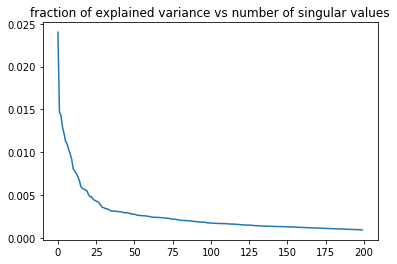

In [62]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(svd.explained_variance_ratio_)
plt.title('fraction of explained variance vs number of singular values');

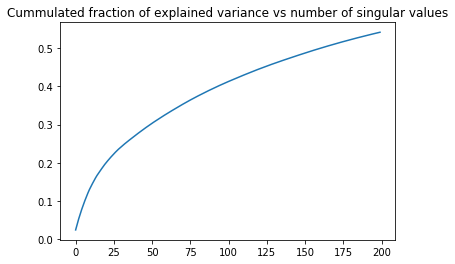

In [63]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title('Cummulated fraction of explained variance vs number of singular values');

In [64]:
print(svd.components_.shape, ratings_matrix.Beername_ID.max())
print(svd_out.shape, ratings_matrix.Username_ID.max())

(200, 82996) 82995
(14000, 200) 13999


#### Recommendation System

In [65]:
ratings_matrix.head()

,Beername_ID,Username_ID,Review_Score,Username_Review_Score,Beer_Review_Score
1,0,0,0.01881,3.94119,0.01881
31469,6667,0,0.23881,3.94119,0.23881
34531,7804,0,-0.05119,3.94119,-0.05119
44486,10545,0,0.20881,3.94119,0.20881
47649,10994,0,0.26881,3.94119,0.26881


In [66]:
cf_df.head()

,Full_Beername,Reviewer_Username,Username_ID,Review_Score
Beername_ID,,,,
0,Stone Brewing Sublimely Self-Righteous Black IPA,Prager62,0,3.96
1,Avery Brewing Company Hog Heaven: Imperial Red IPA,HorseheadsHopHead,1,3.97
2,Great Lakes Brewing Co. Great Lakes Nosferatu,Barnoloid,2,3.90
3,Lagunitas Brewing Company Censored,rodbeermunch,3,3.46
4,"Bell's Brewery, Inc. Bell's Amber Ale",Pantalones,4,4.03


In [67]:
cf_df[cf_df.Full_Beername == "Great Lakes Brewing Co. Great Lakes Nosferatu"]

,Full_Beername,Reviewer_Username,Username_ID,Review_Score
Beername_ID,,,,
2,Great Lakes Brewing Co. Great Lakes Nosferatu,Barnoloid,2,3.9


In [68]:
cf_df[cf_df.Full_Beername == "Bell's Brewery, Inc. Bell's Amber Ale"]

,Full_Beername,Reviewer_Username,Username_ID,Review_Score
Beername_ID,,,,
4,"Bell's Brewery, Inc. Bell's Amber Ale",Pantalones,4,4.03


In [69]:
from sklearn.metrics.pairwise import cosine_similarity

def item_similarity(beerID1, beerID2):
    return cosine_similarity(svd.components_[:,beerID1-1].reshape(1,-1),svd.components_[:,beerID2-1].reshape(1,-1))

In [70]:
def user_similarity(userD1, userID2):
    return cosine_similarity(svd_out[userID1-1,:].reshape(1,-1),svd_out[userID2-1,:].reshape(1,-1))

In [71]:
def get_similar_beers(beerID, n=6):
    vec = cosine_similarity(svd.components_[:,beerID-1].reshape(1,-1),svd.components_.T).reshape(-1)
    res = vec.argsort()[-n:][::-1]
    return list(map(lambda x: (cf_df.Full_Beername[x+1], np.round(vec[x],3)), res))

In [72]:
def get_likes(beer):
    id = cf_df[cf_df.Full_Beername == beer].index[0]
    sims = get_similar_beers(id, n=10)

    print("Beers most similar to {:s}".format(beer))
    print("{:56.56s}".format('beer                           similarity'))
    for sim in sims:
        print ("{:50.50s} {:.3f} ".format(*sim))

In [73]:
get_likes("Great Lakes Brewing Co. Great Lakes Nosferatu")

Beers most similar to Great Lakes Brewing Co. Great Lakes Nosferatu
beer                           similarity               
Great Lakes Brewing Co. Great Lakes Nosferatu      1.000 
Wild Mind Artisan Ales Fleur                       1.000 
Elm City Brewing Co. Simcoe IPA                    1.000 
Ram Restaurant & Brewery - Sunrise Village White W 1.000 
Minneapolis Town Hall Brewery Pineapple Macaroon   1.000 
Riverside Brewery And Restaurant Uncommon Pale Ale 1.000 
Antares Sudestada                                  1.000 
Browar w Grodzisku Wielkopolskim Grodziska White I 1.000 
Moo Brew Pale Ale                                  1.000 
Orchid Island Brewing Pink Lemondrop               1.000 


In [74]:
def cf_recommender():
    beer_options = (cf_df.Full_Beername).tolist()
    beer_input = input("Enter a beer you like: ")
    if beer_input in beer_options:   
        id = cf_df[cf_df.Full_Beername == beer_input].index[0]
        sims = get_similar_beers(id, n=10)
        print("Here are some other beers you might also like:\n")
        for sim in sims:
            print(sim[0])
    else:
        print("Please try entering another beer")

In [75]:
cf_recommender()

Enter a beer you like: Great Lakes Brewing Co. Great Lakes Nosferatu
Here are some other beers you might also like:

Great Lakes Brewing Co. Great Lakes Nosferatu
Wild Mind Artisan Ales Fleur
Elm City Brewing Co. Simcoe IPA
Ram Restaurant & Brewery - Sunrise Village White Whale White IPA
Minneapolis Town Hall Brewery Pineapple Macaroon
Riverside Brewery And Restaurant Uncommon Pale Ale
Antares Sudestada
Browar w Grodzisku Wielkopolskim Grodziska White IPA
Moo Brew Pale Ale
Orchid Island Brewing Pink Lemondrop


In [76]:
cf_recommender()

Enter a beer you like: Bud Light
Please try entering another beer


In [77]:
import pickle

cf_df.to_pickle('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Three/cf_df.pkl')
ratings_matrix.to_pickle('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project Three/ratings_matrix.pkl')

### Comparing Our Two Recommenders

In [78]:
cb_recommender()

Enter a beer you like: Great Lakes Brewing Co. Great Lakes Nosferatu
Here are some other beers you might also like:
 ['Alpine Beer Company Toronado Red', 'Railway City Brewing Company Railway City Iron Spike - Amber Ale', 'Jupiter Honey Wheat', 'Thunder Island Brewing Chocolate Thunder Stout', 'Element Brewing Company Plasma', 'Battle Road Brewing Company Lexington Green East India Pale Ale', 'Bay Bridge Brewing Proctor Valley Porter', 'Glasstown Brewing Co. Clash Of The Pumpkins', 'Beavertown Brewery Gamma Ray APA', 'Pagosa Brewing Co. Wood + Sour: Noir']


In [79]:
cf_recommender()

Enter a beer you like: Great Lakes Brewing Co. Great Lakes Nosferatu
Here are some other beers you might also like:

Great Lakes Brewing Co. Great Lakes Nosferatu
Wild Mind Artisan Ales Fleur
Elm City Brewing Co. Simcoe IPA
Ram Restaurant & Brewery - Sunrise Village White Whale White IPA
Minneapolis Town Hall Brewery Pineapple Macaroon
Riverside Brewery And Restaurant Uncommon Pale Ale
Antares Sudestada
Browar w Grodzisku Wielkopolskim Grodziska White IPA
Moo Brew Pale Ale
Orchid Island Brewing Pink Lemondrop
